In [19]:
import findspark
findspark.init()


In [20]:
from pyspark.sql import SparkSession


# Print Spark version to check if it is working
print(spark.version)


3.5.5


In [21]:
import pyspark 
from pyspark.sql import SparkSession

In [22]:
spark=SparkSession.builder.getOrCreate()

df=spark.sql("select 'spark' as hello")

df.show()


+-----+
|hello|
+-----+
|spark|
+-----+



In [23]:

spark = SparkSession.builder.appName("Test").getOrCreate()
print(spark)


In [24]:
data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]
columns = ["Name", "Age"]


In [25]:
!pip show pyspark to check


Name: pyspark
Version: 3.5.5
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: py4j
Required-by: 


In [23]:
pip install pyspark


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pyspark
print("PySpark Version:", pyspark.__version__)

import py4j
print("Py4J Version:", py4j.__version__)


PySpark Version: 3.5.5
Py4J Version: 0.10.9.7


In [27]:
import sys
print(sys.executable)  # This should point to your Python installation



C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\python.exe


In [28]:
data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]  # Ensure this is a list of tuples



In [29]:
import os
os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "python3"



                                              PLAYER ANALYSIS
                             

In [30]:

from pyspark.sql import SparkSession

# Step 2: Create a SparkSession
spark = SparkSession.builder \
    .appName("CricketAnalysis") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()









In [31]:
# Step 3: Load the CSV file into a Spark DataFrame
file_path = "t20_csv_files/dim_players_no_images.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)



In [32]:
# Step 4: Display the first few rows
df.show(5)

+--------------------+-------+--------------+--------------------+------------------+-----------+
|                name|   team|  battingStyle|        bowlingStyle|       playingRole|description|
+--------------------+-------+--------------+--------------------+------------------+-----------+
|  Michael van Lingen|Namibia| Left hand Bat|     Left arm Medium|Bowling Allrounder|       NULL|
|       Divan la Cock|Namibia|Right hand Bat|            Legbreak|    Opening Batter|       NULL|
|Jan Nicol Loftie-...|Namibia| Left hand Bat|Right arm Medium,...|            Batter|       NULL|
|       Stephan Baard|Namibia|Right hand Bat|Right arm Medium ...|            Batter|       NULL|
|  Gerhard Erasmus(c)|Namibia|Right hand Bat|  Right arm Offbreak|        Allrounder|       NULL|
+--------------------+-------+--------------+--------------------+------------------+-----------+
only showing top 5 rows



In [33]:
# Step 5: Print schema to understand data types
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- team: string (nullable = true)
 |-- battingStyle: string (nullable = true)
 |-- bowlingStyle: string (nullable = true)
 |-- playingRole: string (nullable = true)
 |-- description: string (nullable = true)



In [34]:

# Step 6: Get summary statistics
df.describe().show()

+-------+--------------------+-----------+--------------+--------------------+-------------------+--------------------+
|summary|                name|       team|  battingStyle|        bowlingStyle|        playingRole|         description|
+-------+--------------------+-----------+--------------+--------------------+-------------------+--------------------+
|  count|                 226|        219|           219|                 199|                219|                 151|
|   mean|                NULL|       NULL|          NULL|                NULL|               NULL|                NULL|
| stddev|                NULL|       NULL|          NULL|                NULL|               NULL|                NULL|
|    min|      Aaron Finch(c)|Afghanistan| Left hand Bat|       Left arm Fast|         Allrounder|"""I hit a lot of...|
|    max|same coastal city...|   Zimbabwe|Right hand Bat|Slow Left arm Ort...|Wicketkeeper Batter|Zarai Taraqiati B...|
+-------+--------------------+----------

In [35]:
df.count()


226

In [36]:
from pyspark.sql import functions as F

df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+----+----+------------+------------+-----------+-----------+
|name|team|battingStyle|bowlingStyle|playingRole|description|
+----+----+------------+------------+-----------+-----------+
|   0|   7|           7|          27|          7|         75|
+----+----+------------+------------+-----------+-----------+




                                               Data cleaning


In [37]:
df_cleaned = df.dropna()
df_cleaned.show()



+--------------------+---------+--------------+--------------------+-------------------+--------------------+
|                name|     team|  battingStyle|        bowlingStyle|        playingRole|         description|
+--------------------+---------+--------------+--------------------+-------------------+--------------------+
|         David Wiese|  Namibia|Right hand Bat|Right arm Medium ...|         Allrounder|David Wiese joine...|
|        Kusal Mendis|Sri Lanka|Right hand Bat|            Legbreak|Wicketkeeper Batter|Blessed with a co...|
| Dhananjaya de Silva|Sri Lanka|Right hand Bat|  Right arm Offbreak|         Allrounder|A technically cor...|
|Danushka Gunathilaka|Sri Lanka| Left hand Bat|  Right arm Offbreak|         Allrounder|A poised, attacki...|
|   Bhanuka Rajapaksa|Sri Lanka| Left hand Bat|    Right arm Medium|   Top order Batter|An attacking left...|
|    Dasun Shanaka(c)|Sri Lanka|Right hand Bat|    Right arm Medium|         Allrounder|An explosive midd...|
|Wanindu H

In [38]:
df_cleaned = df_cleaned.dropDuplicates()
df_cleaned.show()



+-----------------+------------+--------------+--------------------+-------------------+--------------------+
|             name|        team|  battingStyle|        bowlingStyle|        playingRole|         description|
+-----------------+------------+--------------+--------------------+-------------------+--------------------+
|     David Warner|   Australia| Left hand Bat|            Legbreak|     Opening Batter|David Warner's ex...|
|    Cameron Green|   Australia|Right hand Bat|Right arm Fast me...| Batting Allrounder|Contracted to Wes...|
|       Mark Adair|     Ireland|Right hand Bat|Right arm Fast me...| Bowling Allrounder|Mark Adair is a t...|
|Regis Chakabva(c)|    Zimbabwe|Right hand Bat|  Right arm Offbreak|Wicketkeeper Batter|A doughty wicketk...|
|  Binura Fernando|   Sri Lanka|Right hand Bat|Left arm Medium fast|             Bowler|Known for his abi...|
|    Anrich Nortje|South Africa|Right hand Bat|      Right arm Fast|             Bowler|"Anrich Nortje is...|
|       Al


                                                 FILTERING


In [39]:
from pyspark.sql.functions import col

experienced_players = df_cleaned.filter(col("playingRole")== "Allrounder")
experienced_players.show(5)



+------------------+-----------+--------------+--------------------+-----------+--------------------+
|              name|       team|  battingStyle|        bowlingStyle|playingRole|         description|
+------------------+-----------+--------------+--------------------+-----------+--------------------+
|  Mohammad Nabi(c)|Afghanistan|Right hand Bat|  Right arm Offbreak| Allrounder|Mohammad Nabi hai...|
|  Dasun Shanaka(c)|  Sri Lanka|Right hand Bat|    Right arm Medium| Allrounder|An explosive midd...|
|   Shakib Al Hasan| Bangladesh| Left hand Bat|Slow Left arm Ort...| Allrounder|When the annals o...|
|Shakib Al Hasan(c)| Bangladesh| Left hand Bat|Slow Left arm Ort...| Allrounder|When the annals o...|
|      Deepak Hooda|      India|Right hand Bat|  Right arm Offbreak| Allrounder|"An allrounder wh...|
+------------------+-----------+--------------+--------------------+-----------+--------------------+
only showing top 5 rows



In [ ]:

                                            MATCH SUMMARY


In [40]:

# Step 1: Start Spark Session
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Match Summary Analysis") \
    .getOrCreate()


In [41]:
# Step 2: Load the CSV into DataFrame
file_path = ""t20_csv_files/fact_bating_summary.csvv"

df = spark.read.option("header", True).csv(file_path)
df.show(5)


+-----------+-----------+-----------+---------+-------+------------+-----------+
|      team1|      team2|     winner|   margin| ground|   matchDate|   match_id|
+-----------+-----------+-----------+---------+-------+------------+-----------+
|    Namibia|  Sri Lanka|    Namibia|  55 runs|Geelong|Oct 16, 2022|T20I # 1823|
|Netherlands|     U.A.E.|Netherlands|3 wickets|Geelong|Oct 16, 2022|T20I # 1825|
|   Scotland|West Indies|   Scotland|  42 runs| Hobart|Oct 17, 2022|T20I # 1826|
|    Ireland|   Zimbabwe|   Zimbabwe|  31 runs| Hobart|Oct 17, 2022|T20I # 1828|
|    Namibia|Netherlands|Netherlands|5 wickets|Geelong|Oct 18, 2022|T20I # 1830|
+-----------+-----------+-----------+---------+-------+------------+-----------+
only showing top 5 rows



In [42]:
# Step 3: Inspect schema and clean
df.printSchema()
df_cleaned = df.dropna()  # Remove rows with null values
df_cleaned.show(5)


root
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- winner: string (nullable = true)
 |-- margin: string (nullable = true)
 |-- ground: string (nullable = true)
 |-- matchDate: string (nullable = true)
 |-- match_id: string (nullable = true)

+-----------+-----------+-----------+---------+-------+------------+-----------+
|      team1|      team2|     winner|   margin| ground|   matchDate|   match_id|
+-----------+-----------+-----------+---------+-------+------------+-----------+
|    Namibia|  Sri Lanka|    Namibia|  55 runs|Geelong|Oct 16, 2022|T20I # 1823|
|Netherlands|     U.A.E.|Netherlands|3 wickets|Geelong|Oct 16, 2022|T20I # 1825|
|   Scotland|West Indies|   Scotland|  42 runs| Hobart|Oct 17, 2022|T20I # 1826|
|    Ireland|   Zimbabwe|   Zimbabwe|  31 runs| Hobart|Oct 17, 2022|T20I # 1828|
|    Namibia|Netherlands|Netherlands|5 wickets|Geelong|Oct 18, 2022|T20I # 1830|
+-----------+-----------+-----------+---------+-------+------------+---------

In [43]:
df_cleaned = df_cleaned.dropDuplicates()
df_cleaned.show()


+-----------+------------+------------+----------+---------+------------+-----------+
|      team1|       team2|      winner|    margin|   ground|   matchDate|   match_id|
+-----------+------------+------------+----------+---------+------------+-----------+
|    Ireland| West Indies|     Ireland| 9 wickets|   Hobart|Oct 21, 2022|T20I # 1837|
|    Namibia|   Sri Lanka|     Namibia|   55 runs|  Geelong|Oct 16, 2022|T20I # 1823|
|New Zealand|   Sri Lanka| New Zealand|   65 runs|   Sydney|Oct 29, 2022|T20I # 1850|
|Netherlands|    Zimbabwe| Netherlands| 5 wickets| Adelaide| Nov 2, 2022|T20I # 1859|
|   Scotland| West Indies|    Scotland|   42 runs|   Hobart|Oct 17, 2022|T20I # 1826|
| Bangladesh|    Zimbabwe|  Bangladesh|    3 runs| Brisbane|Oct 30, 2022|T20I # 1851|
|    England|     Ireland|     Ireland|    5 runs|Melbourne|Oct 26, 2022|T20I # 1846|
|   Pakistan|South Africa|    Pakistan|   33 runs|   Sydney| Nov 3, 2022|T20I # 1861|
|    England|       India|     England|10 wickets| Ade

In [ ]:


                                         FILTER


In [44]:
# Step 4: Filter matches 
from pyspark.sql.functions import col

melbourne_matches = df_cleaned.filter(col("ground") == "Melbourne")
melbourne_matches.show(5)


+-------+--------+-------+---------+---------+------------+-----------+
|  team1|   team2| winner|   margin|   ground|   matchDate|   match_id|
+-------+--------+-------+---------+---------+------------+-----------+
|England| Ireland|Ireland|   5 runs|Melbourne|Oct 26, 2022|T20I # 1846|
|  India|Pakistan|  India|4 wickets|Melbourne|Oct 23, 2022|T20I # 1842|
|England|Pakistan|England|5 wickets|Melbourne|Nov 13, 2022|T20I # 1879|
|  India|Zimbabwe|  India|  71 runs|Melbourne| Nov 6, 2022|T20I # 1873|
+-------+--------+-------+---------+---------+------------+-----------+



In [45]:
# Step 5: Group by 'winner' and count number of wins
winner_counts = df_cleaned.groupBy("winner").count().orderBy("count", ascending=False)
winner_counts.show()


+------------+-----+
|      winner|count|
+------------+-----+
|     England|    5|
|   Sri Lanka|    4|
|       India|    4|
|    Pakistan|    4|
| Netherlands|    4|
|     Ireland|    3|
|    Zimbabwe|    3|
| New Zealand|    3|
|   Australia|    3|
|  Bangladesh|    2|
|South Africa|    2|
| West Indies|    1|
|      U.A.E.|    1|
|     Namibia|    1|
|    Scotland|    1|
+------------+-----+




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


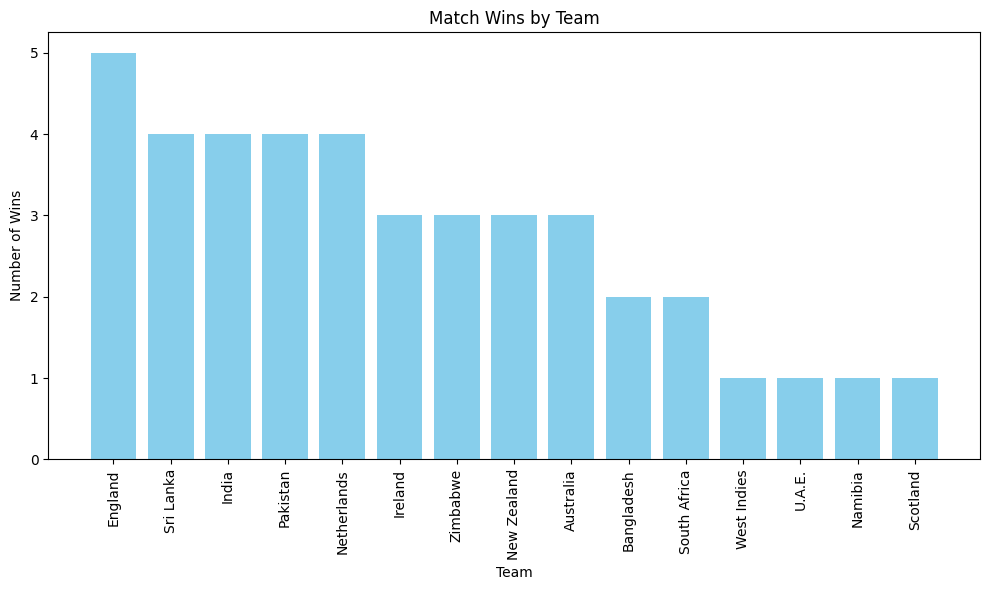

In [49]:
!pip install pandas

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(winner_counts_pd['winner'], winner_counts_pd['count'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Match Wins by Team")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.tight_layout()
plt.show()





In [ ]:

                                                    BATTING SUMMARY


In [52]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, desc

# Step 1: Initialize Spark session
spark = SparkSession.builder \
    .appName("FactBattingSummaryAnalysis") \
    .getOrCreate()

In [54]:
# Step 2: Load the CSV
file_path = "t20_csv_files/fact_bating_summary.csv"  # Make sure this file is in the same directory as your notebook
df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)
df.printSchema()
df.show(5, truncate=False)


root
 |-- match: string (nullable = true)
 |-- teamInnings: string (nullable = true)
 |-- battingPos: integer (nullable = true)
 |-- batsmanName: string (nullable = true)
 |-- dismissal: string (nullable = true)
 |-- runs: integer (nullable = true)
 |-- balls: integer (nullable = true)
 |-- 4s: integer (nullable = true)
 |-- 6s: integer (nullable = true)
 |-- SR: string (nullable = true)
 |-- out/not_out: string (nullable = true)
 |-- match_id: string (nullable = true)

+--------------------+-----------+----------+----------------------+-------------------------------+----+-----+---+---+------+-----------+-----------+
|match               |teamInnings|battingPos|batsmanName           |dismissal                      |runs|balls|4s |6s |SR    |out/not_out|match_id   |
+--------------------+-----------+----------+----------------------+-------------------------------+----+-----+---+---+------+-----------+-----------+
|Namibia Vs Sri Lanka|Namibia    |1         |Michael van Lingen    |c Pr

In [56]:


# Step: Group by batsman and aggregate
total_runs = df.groupBy("batsmanName").agg(
    sum("runs").alias("total_runs"),
    avg("runs").alias("average_runs")
).orderBy(desc("total_runs"))

# Show top 10 run scorers
total_runs.show(10)


+----------------+----------+------------------+
|     batsmanName|total_runs|      average_runs|
+----------------+----------+------------------+
|     Virat Kohli|       296|49.333333333333336|
|      Max O'Dowd|       242|             30.25|
|Suryakumar Yadav|       239|39.833333333333336|
|Jos Buttler(c)â€|       225|              37.5|
|  Kusal Mendisâ€|       223|            27.875|
|   Sikandar Raza|       219|            27.375|
| Pathum Nissanka|       214|30.571428571428573|
|      Alex Hales|       212|35.333333333333336|
| Lorcan Tuckerâ€|       204|29.142857142857142|
|  Glenn Phillips|       201|              40.2|
+----------------+----------+------------------+
only showing top 10 rows



In [60]:
# Register your DataFrame as a SQL view
df.createOrReplaceTempView("batting_summary")

# Corrected SQL query
spark.sql("""
    SELECT batsmanName, SUM(runs) as total
    FROM batting_summary
    GROUP BY batsmanName
    ORDER BY total DESC
    LIMIT 5
""").show()


+----------------+-----+
|     batsmanName|total|
+----------------+-----+
|     Virat Kohli|  296|
|      Max O'Dowd|  242|
|Suryakumar Yadav|  239|
|Jos Buttler(c)â€|  225|
|  Kusal Mendisâ€|  223|
+----------------+-----+



In [68]:
from pyspark.sql.functions import sum, desc

top_batsmen = df.groupBy("batsmanName").agg(
    sum("runs").alias("total_runs")
).orderBy(desc("total_runs")).limit(10)

top_batsmen_pd = top_batsmen.toPandas()
total_runs.show(10)


+----------------+----------+------------------+
|     batsmanName|total_runs|      average_runs|
+----------------+----------+------------------+
|     Virat Kohli|       296|49.333333333333336|
|      Max O'Dowd|       242|             30.25|
|Suryakumar Yadav|       239|39.833333333333336|
|Jos Buttler(c)â€|       225|              37.5|
|  Kusal Mendisâ€|       223|            27.875|
|   Sikandar Raza|       219|            27.375|
| Pathum Nissanka|       214|30.571428571428573|
|      Alex Hales|       212|35.333333333333336|
| Lorcan Tuckerâ€|       204|29.142857142857142|
|  Glenn Phillips|       201|              40.2|
+----------------+----------+------------------+
only showing top 10 rows



In [71]:
pos_runs = df.groupBy("battingPos").agg(
    sum("runs").alias("total_runs")
).orderBy("battingPos")

pos_runs_pd = pos_runs.toPandas()



In [ ]:

                                            TOP 10 BATSMEN


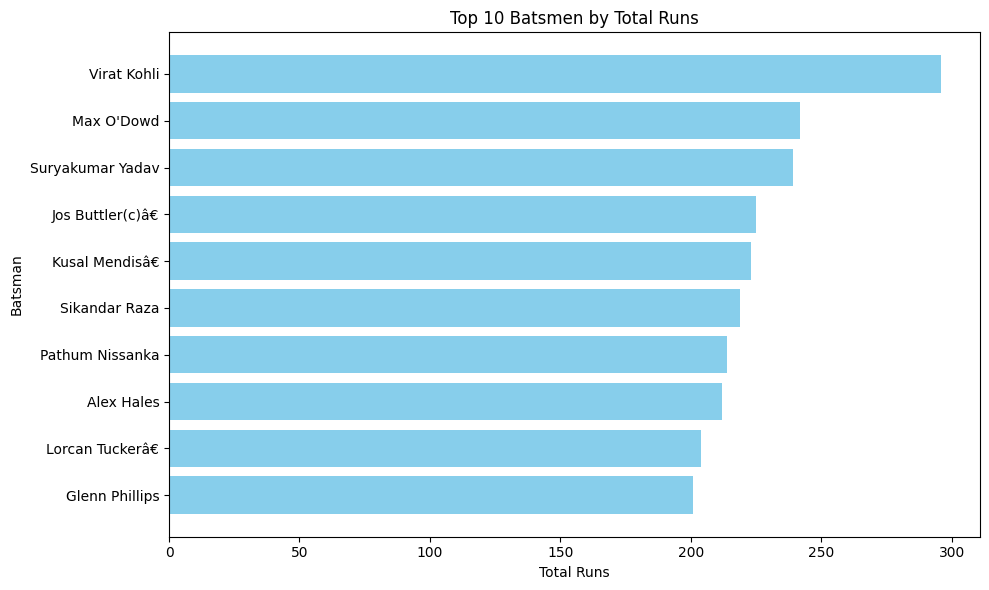

In [75]:

import matplotlib.pyplot as plt

# Sort to match bars from top to bottom
top_batsmen_pd_sorted = top_batsmen_pd.sort_values("total_runs")

plt.figure(figsize=(10, 6))
plt.barh(top_batsmen_pd_sorted["batsmanName"], top_batsmen_pd_sorted["total_runs"], color="skyblue")
plt.title("Top 10 Batsmen by Total Runs")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


In [ ]:

                                                BOWLING SUMMARY


In [83]:


# Start Spark Session
spark = SparkSession.builder.appName("TopBowlersAnalysis").getOrCreate()

# Load bowling summary CSV
df_bowling = spark.read.option("header", True).option("inferSchema", True).csv("t20_csv_files/fact_bowling_summary.csV")

# Print schema to confirm
df_bowling.printSchema()





root
 |-- match: string (nullable = true)
 |-- bowlingTeam: string (nullable = true)
 |-- bowlerName: string (nullable = true)
 |-- overs: double (nullable = true)
 |-- maiden: integer (nullable = true)
 |-- runs: integer (nullable = true)
 |-- wickets: integer (nullable = true)
 |-- economy: double (nullable = true)
 |-- 0s: integer (nullable = true)
 |-- 4s: integer (nullable = true)
 |-- 6s: integer (nullable = true)
 |-- wides: integer (nullable = true)
 |-- noBalls: integer (nullable = true)
 |-- match_id: string (nullable = true)



In [84]:
# Group by bowlerName and calculate total wickets
top_bowlers = df_bowling.groupBy("bowlerName") \
    .agg(sum("wickets").alias("total_wickets")) \
    .orderBy(desc("total_wickets")) \
    .limit(10)

# Show result
top_bowlers.show()

+--------------------+-------------+
|          bowlerName|total_wickets|
+--------------------+-------------+
|Wanindu Hasaranga...|           15|
|        Bas de Leede|           13|
|          Sam Curran|           13|
| Blessing Muzarabani|           12|
|         Josh Little|           11|
|   Paul van Meekeren|           11|
| Shaheen Shah Afridi|           11|
|         Shadab Khan|           11|
|       Anrich Nortje|           11|
|       Sikandar Raza|           10|
+--------------------+-------------+



In [ ]:

# Convert to Pandas if needed for visualization
top_bowlers_pd = top_bowlers.toPandas()

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(top_bowlers_pd["economy"], top_bowlers_pd["total_wickets"], color="green", s=100, alpha=0.6)
for i in range(len(top_bowlers_pd)):
    plt.text(top_bowlers_pd["economy"][i]+0.02, top_bowlers_pd["total_wickets"][i], 
             top_bowlers_pd["bowlerName"][i], fontsize=9)
plt.xlabel("Economy Rate")
plt.ylabel("Total Wickets")
plt.title("Top Bowlers: Economy vs Wickets")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


KeyError: 'economy'

<Figure size 1000x600 with 0 Axes>